In [158]:
import numpy as np
import pandas as pd

In [84]:
import solver
reload(solver)

<module 'solver' from 'solver.py'>

In [20]:
PbFilename1 = r'./data/tsp_51_1'
PbFilename2 = r'./data/tsp_100_3'
PbFilename3 = r'./data/tsp_200_2'
PbFilename4 = r'./data/tsp_574_1'
PbFilename5 = r'./data/tsp_1889_1'
PbFilename6 = r'./data/tsp_33810_1'

In [5]:
data = solver.load_data(PbFilename4)
first_sol = solver.tsp_simple_fast_kd(data,10)

HBox(children=(IntProgress(value=0, max=573), HTML(value=u'')))

In [225]:
reload(solver)
data, sol_step0, opt_obj, opt_sol, path = solver.solve_tsp(PbFilename4,
                             50000,
                             neighbourhood_type='best',
                             first_points=20,
                             first_closest=20,
                             random_pick_size=100,                        
                             local_search_type='tabu',
                             tabu_flag=True,
                             tabu_print_size=60,
                             tabu_size = 1000)

HBox(children=(IntProgress(value=0, description=u'ls tabu: ', max=50000), HTML(value=u'')))

50000/|/cur/opt obj: 41327/41267: 100%|| 50000/50000 [07:06<00:00, 118.92it/s]                                                                            

In [283]:
reload(solver)
data, sol_step1, opt_obj_2, opt_sol_2, path2 = solver.solve_tsp(PbFilename4,
                             50000,
                             neighbourhood_type='best',
                             first_points=20,
                             first_closest=20,
                             random_pick_size=100,                        
                             local_search_type='tabu',
                             tabu_flag=True,
                             tabu_print_size=100,
                             tabu_size = 1000,
                             sol_step0 = opt_sol)

HBox(children=(IntProgress(value=0, description=u'ls tabu: ', max=50000), HTML(value=u'')))

50000/|/cur/opt obj: 39587/39374: 100%|| 50000/50000 [07:17<00:00, 118.61it/s]                                                                            

In [66]:
%matplotlib inline

In [284]:
solver.objective_fast(sol_step0,data)

45502.381697989309

In [285]:
solver.objective_fast(opt_sol,data)

41266.622902978888

In [286]:
solver.objective_fast(opt_sol_2,data)

39374.468429332577

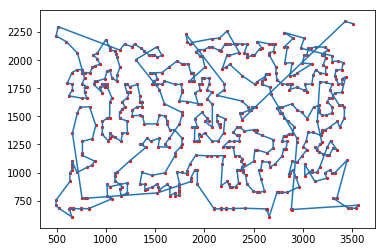

In [287]:
solver.plot_sol(data,sol_step0)

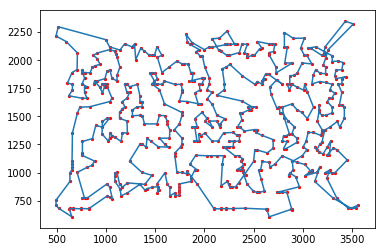

In [288]:
solver.plot_sol(data,opt_sol)

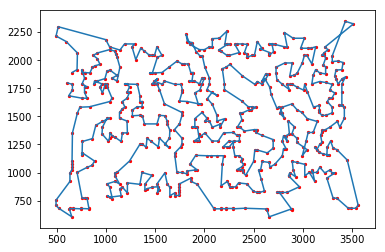

In [289]:
solver.plot_sol(data,opt_sol_2)

In [237]:
path_df = pd.DataFrame(np.array(path).reshape((len(path)/4,4)),columns=['it','p1','p2','cur_obj'])

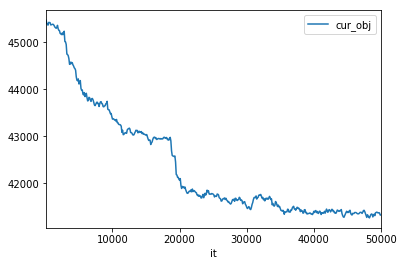

In [243]:
path_df.set_index(['it'])[['cur_obj']].plot() 

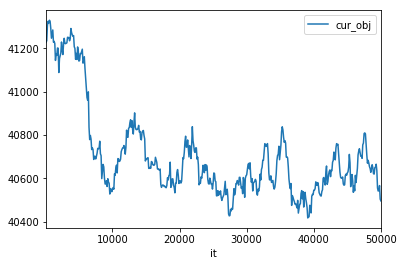

In [251]:
path2_df = pd.DataFrame(np.array(path2).reshape((len(path2)/4,4)),columns=['it','p1','p2','cur_obj']) 
path2_df.set_index(['it'])[['cur_obj']].plot() 

In [280]:
obj_vec_step0 = pd.DataFrame(solver.objective2_vec_fast(sol_step0,data),columns=['step0']).sort_values('step0',ascending=False).apply(np.sqrt).reset_index(drop=True)
obj_vec_opt = pd.DataFrame(solver.objective2_vec_fast(opt_sol,data),columns=['opt']).sort_values('opt',ascending=False).apply(np.sqrt).reset_index(drop=True)
obj_vec_opt_2 = pd.DataFrame(solver.objective2_vec_fast(opt_sol_2,data),columns=['opt_2']).sort_values('opt_2',ascending=False).apply(np.sqrt).reset_index(drop=True)

In [282]:
obj_vec_step0.join(obj_vec_opt).join(obj_vec_opt_2).head(100)

,step0,opt,opt_2
0,1626.129468,496.770470,461.495937
1,1367.286269,344.864704,416.809974
2,716.636978,311.191218,356.544091
3,675.482370,272.560018,311.191218
4,660.427000,259.030191,272.560018
5,594.082782,250.150560,252.384775
6,588.475176,243.959033,250.150560
7,588.293301,240.971883,239.636901
8,470.117454,239.636901,234.186191
9,359.680517,238.471885,223.501800
